In [1]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(cv2.__version__)

4.5.1


In [3]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[12,12])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

# Convert Image To Gray

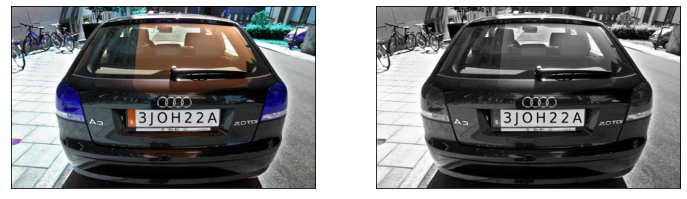

In [4]:
path = './images/car_1.jpg'
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_images(image,gray)

# Blur The Gray Image

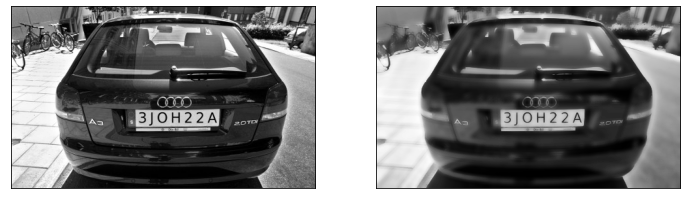

In [5]:
blur = cv2.bilateralFilter(gray, 10,80,100)
plot_images(gray, blur)

# Get The Edges of This Image

In [6]:
edges = cv2.Canny(blur, 30,190)

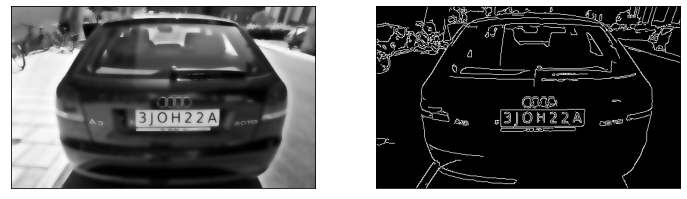

In [7]:
plot_images(blur, edges)

# Getting Contours of The Image

In [8]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
image_copy = image.copy()

In [10]:
_ = cv2.drawContours(image_copy, cnts, -1, (127,0,255),2)

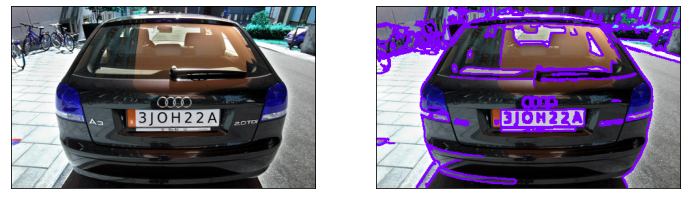

In [11]:
plot_images(image, image_copy)

# Picking Up limited Contour Points

In [12]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [13]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (127,0,255),2)

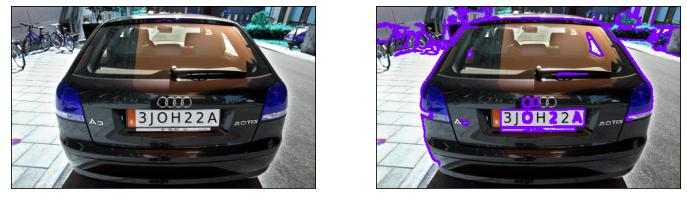

In [14]:
plot_images(image, image_copy)

# Cropping Out The Licence Plate

In [15]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

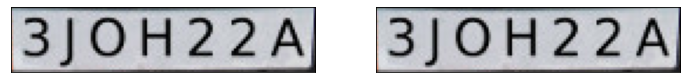

In [16]:
plot_images(plate, plate)

# Using Pytesseract To Print The Licence Plate Number

In [17]:
import pytesseract
text = pytesseract.image_to_string(plate, lang="eng")
print(text)

3JOH22A



# Printing Current Time

In [18]:
from datetime import datetime

now = datetime.now()

current_time1 = now.strftime("%H:%M:%S")
print("Current Time =", current_time1)

Current Time = 08:49:53


# Creating A Log of Time

In [1]:
from datetime import *
import sys

def write_temp(temperature,file_name):

        print ("In write_temp function - "+file_name)

        with open(file_name, 'a') as log:
                log.write("{0},{1}\n".format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"),str(temperature)))


arg = sys.argv[1]
filename1 = "date.csv"
print ("File name is "+filename1)
write_temp(1,filename1)

File name is date.csv
In write_temp function - date.csv


# Printing The Time Duration

In [2]:
import csv
input_file = csv.DictReader(open("date.csv"))
for row in input_file:
    print (row)